In [90]:
pip install keras-tuner -q

In [91]:
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras_tuner
from tensorflow import keras
from sklearn.model_selection import train_test_split
# NumPy 的浮點數表示精度
np.set_printoptions(suppress=True, precision=4)

In [92]:
df=pd.read_csv("/content/hour.csv")

In [93]:
missing_data=df.isnull().sum()
print("裡面有空值的：",missing_data[missing_data>0])

裡面有空值的： Series([], dtype: int64)


In [94]:
#查看類別特徵有幾個，數值特徵有幾個
all_cols=df.columns.tolist()
categorical=0
numerical=0
for col in all_cols:
    if(df[col].dtype == 'object'):
        categorical+=1
    else:
        numerical+=1
print("類別型態的一共有：",categorical)
print("數值型態的一共有：",numerical)
print(df.dtypes)

類別型態的一共有： 1
數值型態的一共有： 16
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


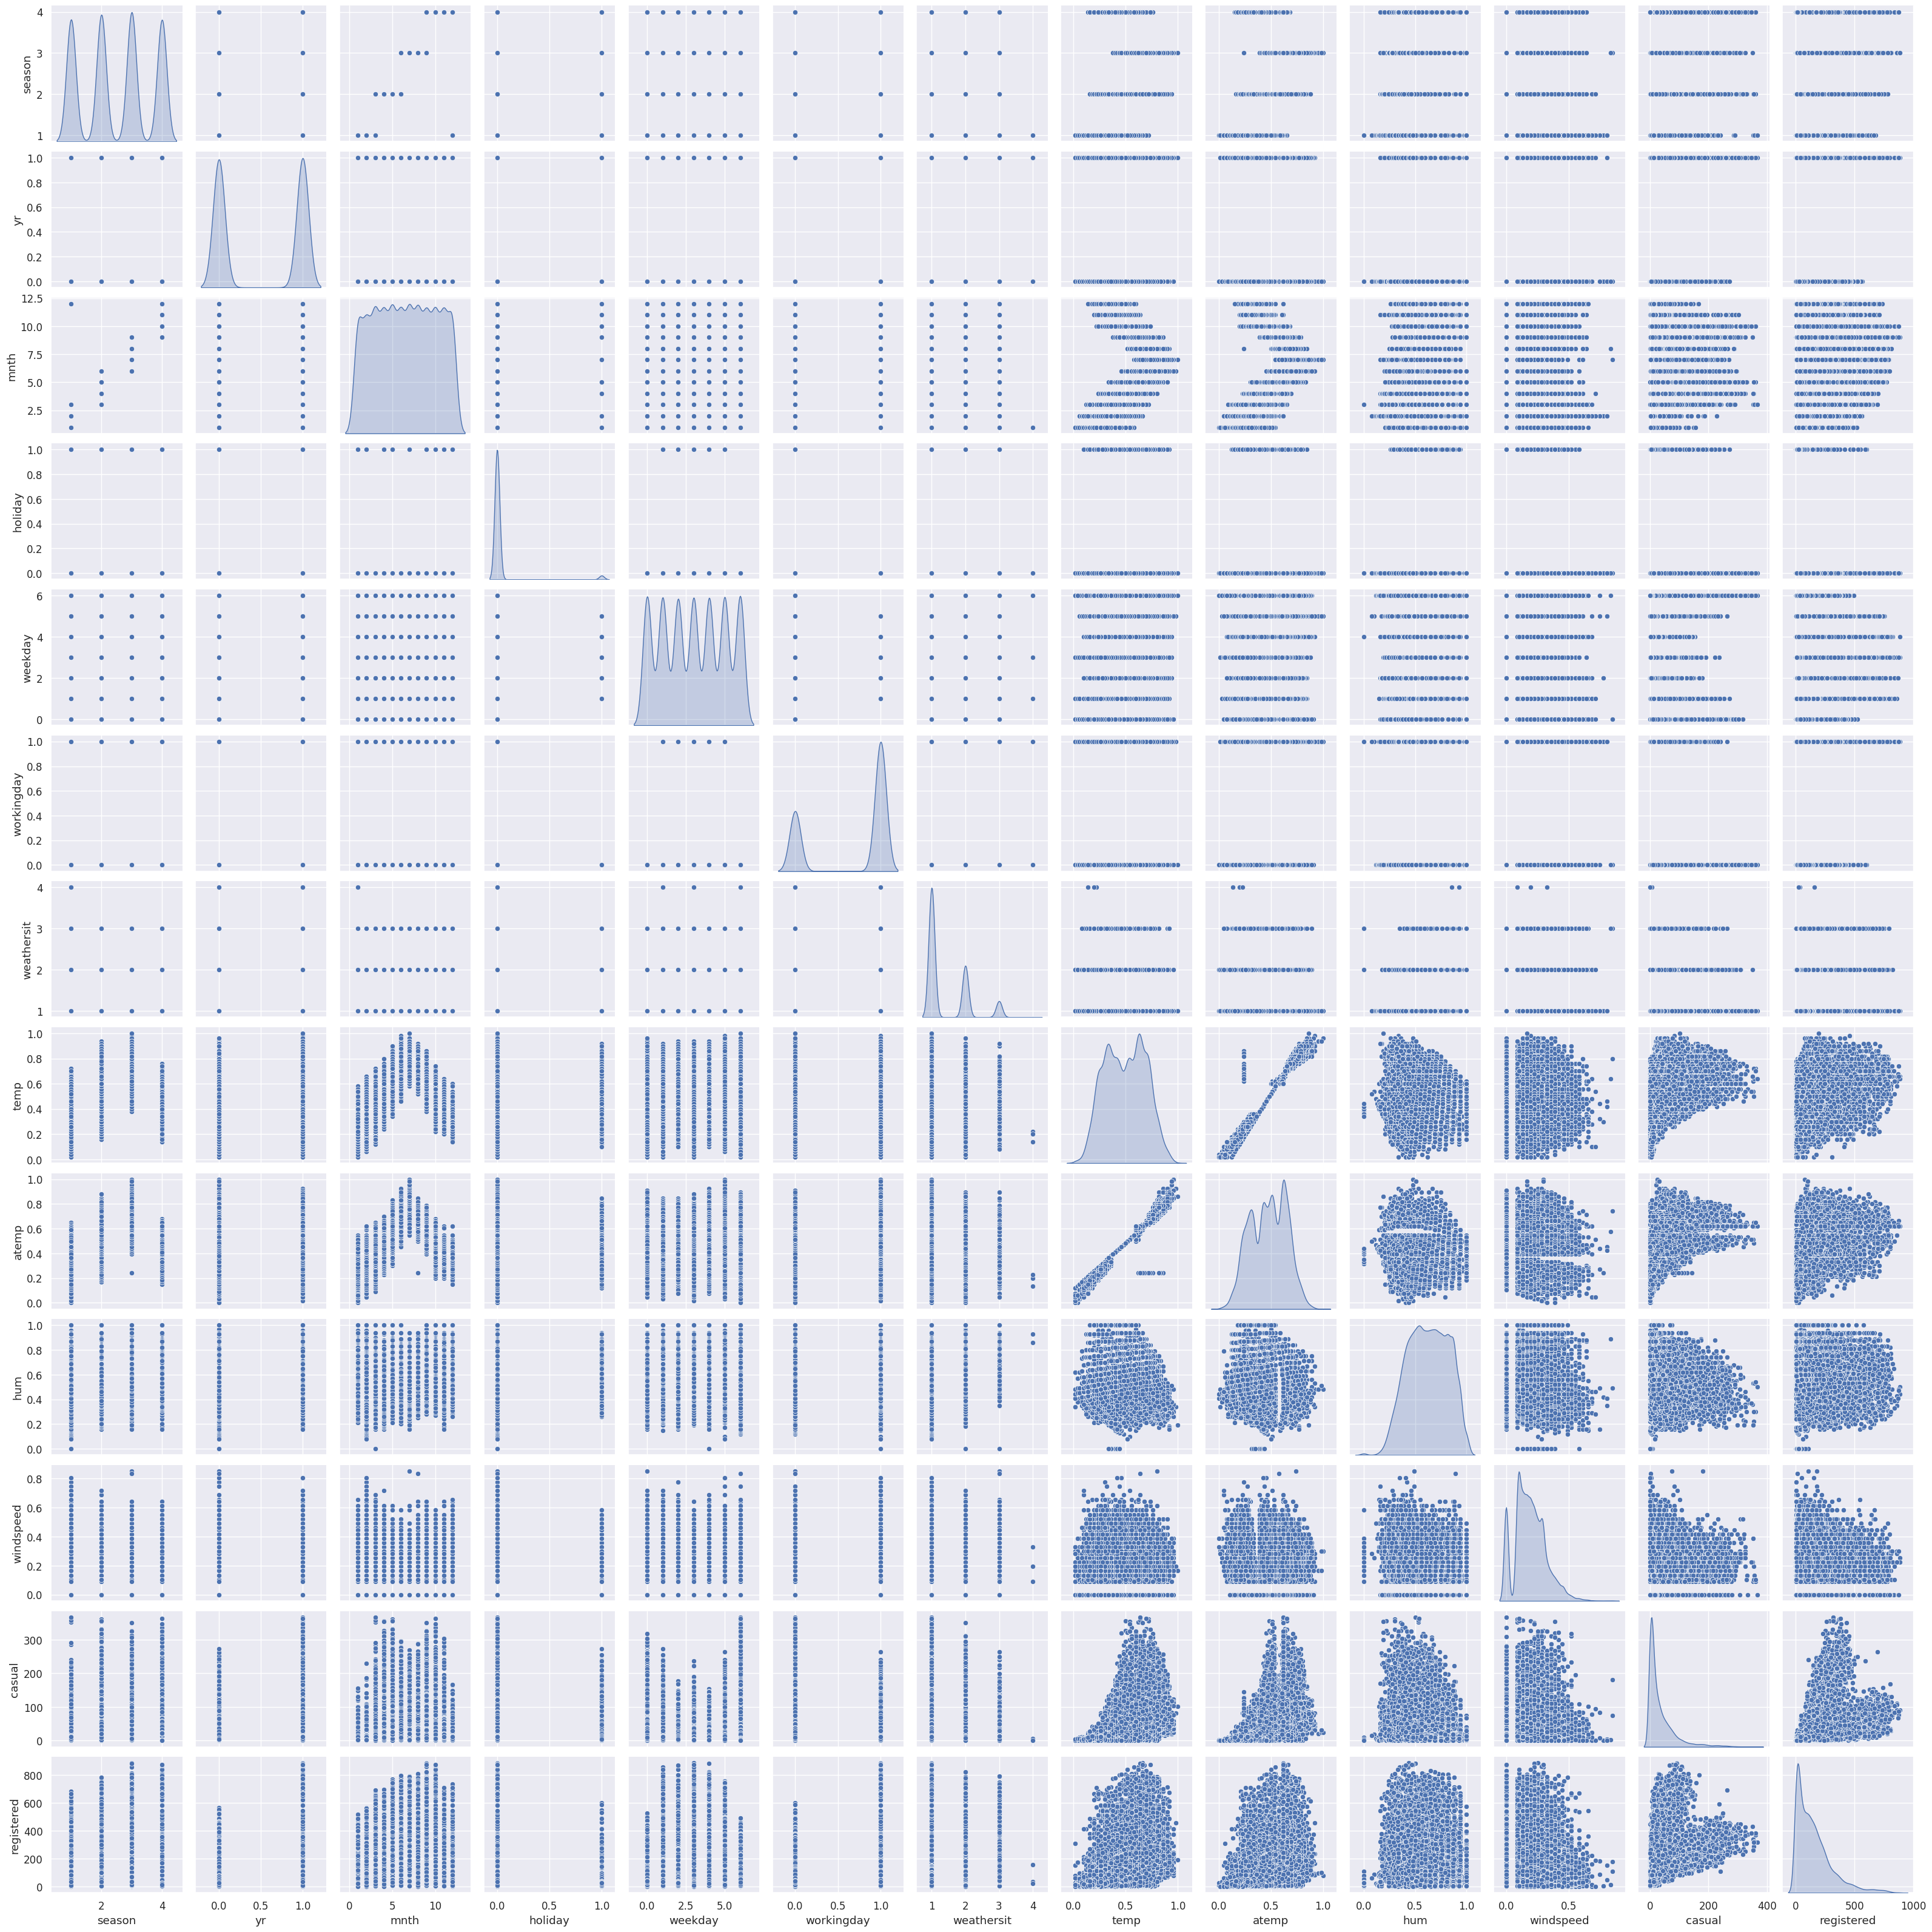

In [95]:
sns.pairplot(df[["season", "yr", "mnth", "holiday","weekday",'workingday',"weathersit","temp","atemp","hum","windspeed","casual","registered"]], diag_kind="kde")

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


<Axes: >

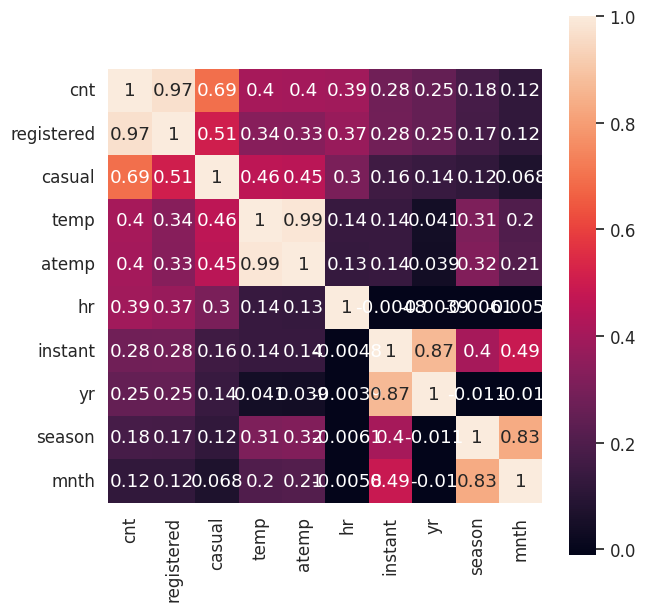

In [96]:
corrmat=df.corr()
display(corrmat)


y=df[['cnt']]
# 
train = df.iloc[:len(y),:]
cols = train .corr().nlargest(10,'cnt').index
plt.subplots(figsize=(7,7))
sns.set(font_scale=1.1)
sns.heatmap(train[cols].corr(),square=True, annot=True)

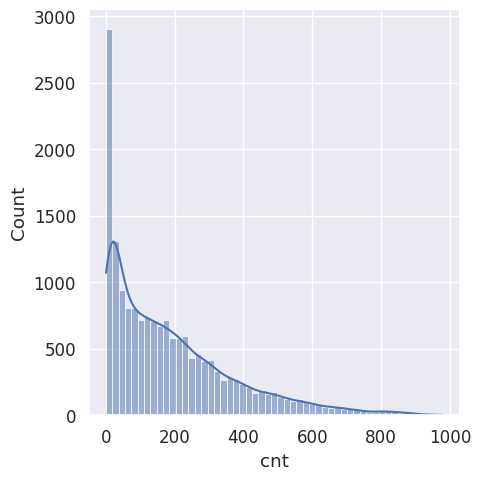

5      260
6      236
4      231
3      224
2      208
      ... 
913      1
847      1
777      1
661      1
636      1
Name: cnt, Length: 869, dtype: int64


In [97]:
sns.displot(df.get("cnt"),kde=True)
plt.show()
print(df['cnt'].value_counts())

In [98]:
df=df.drop("dteday",axis=1)# 從上面的熱圖可以看出來我們的dteday的影響不大，所以刪除
df=df.drop("instant",axis=1)#instant沒有意義，他是index
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [99]:
df1=df.copy()

In [100]:
# 刪除cnt並且把cnt那一行給y
y['cnt']= df.pop('cnt')
y

,cnt
0,16
1,40
2,32
3,13
4,1
...,...
17374,119
17375,89
17376,90
17377,61


In [101]:
# y=y.astype(float)

In [102]:
# tf.convert_to_tensor(df)
# tf.convert_to_tensor(y)
df=df.to_numpy()
y=y.to_numpy()

In [103]:
# x_train,x_test,x_valid=tf.split(df,num_or_size_splits=[11122,2781,3476],axis=0)
# y_train,y_test,y_valid=tf.split(y,num_or_size_splits=[11122,2781,3476],axis=0)
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=7)
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,test_size=0.5,random_state=7)

In [104]:
# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
# valid_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_valid_scaler=scaler.transform(x_valid)
x_test_scaler=scaler.transform(x_test)

In [106]:
model = tf.keras.models.Sequential([
    #Flatten：拉直層，只是做形狀轉換而已並不包括計算，他會把多維的特徵拉直變成一維，很常在圖片辨識中看到他，因圖片資料是二維
    tf.keras.layers.Dense(60,activation="relu",input_shape=x_train.shape[1:]),#14代表我們的特徵數目
    tf.keras.layers.Dense(60,activation="relu"),
    tf.keras.layers.Dense(1),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 60)                900       
                                                                 
 dense_11 (Dense)            (None, 60)                3660      
                                                                 
 dense_12 (Dense)            (None, 1)                 61        
                                                                 
Total params: 4621 (18.05 KB)
Trainable params: 4621 (18.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


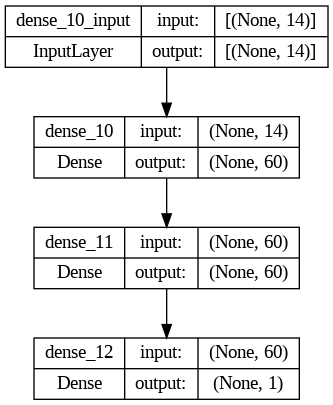

In [107]:
# 繪製模型圖，show_shapes=True 可以顯示 input/output 維度，有助於比對，若圖太小，可利用 to_file='XXX' 存檔，利用影像軟體放大檢視
# keras.utils.plot_model(model, show_shapes=True, to_file='debug_model.png')
tf.keras.utils.plot_model(model, show_shapes=True)

In [108]:
model.compile(loss= "mean_squared_error",optimizer=tf.keras.optimizers.RMSprop(0.01),metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsolutePercentageError()])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)]
history = model.fit(x_train,y_train,
                    validation_data=(x_valid,y_valid),
                    epochs = 50,verbose=2,batch_size=1000,
                    callbacks=callbacks
                    )
# model.fit會返回一個 History 對象。History.history 属性是連續 epoch 訓練損失和評估值，以及驗證集損失和評估值的紀錄

Epoch 1/50
13/13 - 1s - loss: 7803.0527 - mean_absolute_error: 37.9891 - root_mean_squared_error: 88.3349 - mean_absolute_percentage_error: 28.0261 - val_loss: 94.2820 - val_mean_absolute_error: 5.8978 - val_root_mean_squared_error: 9.7099 - val_mean_absolute_percentage_error: 4.6050 - 873ms/epoch - 67ms/step
Epoch 2/50
13/13 - 0s - loss: 1447.1719 - mean_absolute_error: 24.7269 - root_mean_squared_error: 38.0417 - mean_absolute_percentage_error: 17.3056 - val_loss: 164.6671 - val_mean_absolute_error: 9.3479 - val_root_mean_squared_error: 12.8323 - val_mean_absolute_percentage_error: 8.2353 - 100ms/epoch - 8ms/step
Epoch 3/50
13/13 - 0s - loss: 1071.5594 - mean_absolute_error: 20.5106 - root_mean_squared_error: 32.7347 - mean_absolute_percentage_error: 14.0557 - val_loss: 385.9997 - val_mean_absolute_error: 13.7420 - val_root_mean_squared_error: 19.6469 - val_mean_absolute_percentage_error: 8.8193 - 87ms/epoch - 7ms/step
Epoch 4/50
13/13 - 0s - loss: 840.9882 - mean_absolute_error: 19.

In [109]:
model.evaluate(x_test,y_test)

82/82 [==============================] - 0s 2ms/step - loss: 977.8964 - mean_absolute_error: 23.1193 - root_mean_squared_error: 31.2713 - mean_absolute_percentage_error: 14.3835


[977.8964233398438, 23.119274139404297, 31.27133560180664, 14.38350772857666]

In [110]:
def plotLearningCurves(history):
    df = pd.DataFrame(history.history)
    df.plot(figsize=(8,5))
    plt.grid(True) # 顯示網格
    plt.gca().set_ylim(0, 200)
    plt.show()

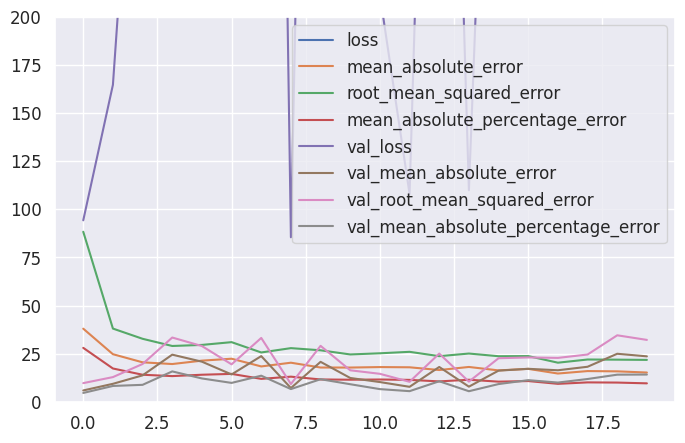

In [111]:
plotLearningCurves(history)

In [112]:
model.compile(loss= "mse",optimizer=tf.keras.optimizers.RMSprop(0.01),metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsolutePercentageError()])
history = model.fit(x_train_scaler,y_train,
                    validation_data=(x_valid_scaler,y_valid),
                    epochs = 50,verbose=2,batch_size=500,
                    callbacks=callbacks
                    )

Epoch 1/50
25/25 - 1s - loss: 40365.3438 - mean_absolute_error: 141.4507 - root_mean_squared_error: 200.9113 - mean_absolute_percentage_error: 354.3750 - val_loss: 24694.2148 - val_mean_absolute_error: 123.7932 - val_root_mean_squared_error: 157.1439 - val_mean_absolute_percentage_error: 617.5643 - 880ms/epoch - 35ms/step
Epoch 2/50
25/25 - 0s - loss: 17841.0605 - mean_absolute_error: 102.7658 - root_mean_squared_error: 133.5704 - mean_absolute_percentage_error: 485.3540 - val_loss: 13345.8750 - val_mean_absolute_error: 82.6700 - val_root_mean_squared_error: 115.5243 - val_mean_absolute_percentage_error: 261.1734 - 115ms/epoch - 5ms/step
Epoch 3/50
25/25 - 0s - loss: 8958.3340 - mean_absolute_error: 68.9674 - root_mean_squared_error: 94.6485 - mean_absolute_percentage_error: 216.2055 - val_loss: 6425.8877 - val_mean_absolute_error: 59.6457 - val_root_mean_squared_error: 80.1616 - val_mean_absolute_percentage_error: 145.4216 - 123ms/epoch - 5ms/step
Epoch 4/50
25/25 - 0s - loss: 4773.71

In [113]:
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hp.Choice('units', [8,16,32,64,128]), activation="relu",input_shape=[14]),
        tf.keras.layers.Dense(hp.Choice('units', [8,16,32,64,128]), activation="relu"),
        tf.keras.layers.Dense(1)
    ])
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(0.01),
        loss="mean_squared_error",
        metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsolutePercentageError()])
    return model

In [114]:
tuner = keras_tuner.RandomSearch(
    build_model,
    overwrite=True,
    # max_trials = 5,
    objective='val_loss')# 要最佳化的目標的名稱
tuner.search(x_train, y_train, epochs=20,batch_size=1000,validation_data=(x_valid, y_valid),callbacks=callbacks)
best_model = tuner.get_best_models()[0]#取最好的模型中的一個

Trial 5 Complete [00h 00m 04s]
val_loss: 37.54513931274414

Best val_loss So Far: 37.54513931274414
Total elapsed time: 00h 00m 16s


In [115]:
best_model.summary()
best_model.evaluate(x_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 120       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
82/82 [==============================] - 0s 2ms/step - loss: 37.6184 - mean_absolute_error: 4.3722 - root_mean_squared_error: 6.1334 - mean_absolute_percentage_error: 7.2888


[37.6184196472168, 4.372177600860596, 6.13338565826416, 7.28884744644165]

In [116]:
# weekday其實他是類別型態的資料
y1=df1.pop('weekday')

In [117]:
from tensorflow.keras.utils import to_categorical
#把標籤轉換成One-hot編碼
y1= to_categorical(y1)

In [118]:
type(y1)

numpy.ndarray

In [119]:
df1=df1.to_numpy()

In [120]:
print(type(y1))
print(y1)

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [121]:
x_train,x_test,y_train,y_test=train_test_split(df1,y1,test_size=0.3,stratify=y1,random_state=7)#根據y的label比例去切割資料
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,test_size=0.5,stratify=y_test,random_state=7)

In [122]:
#確定資料的大小 
x_train.shape

(12165, 14)

In [123]:
pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(256,input_dim=14,activation='relu'),
        tf.keras.layers.Dense(256,input_dim=14,activation='relu'),
        tf.keras.layers.Dense(256,input_dim=14,activation='relu'),
        tf.keras.layers.Dense(256,input_dim=14,activation='relu'),
        tf.keras.layers.Dense(256,input_dim=14,activation='relu'),
        tf.keras.layers.Dense(256,input_dim=14,activation='relu'),
        tf.keras.layers.Dense(7,activation='softmax')
    ])
#嘗試增加層數或dense數目
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=[tf.keras.metrics.F1Score(threshold=0.4),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [125]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='precision',patience=20)]

In [126]:
#開始訓練
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=100,
                    validation_data=(x_valid, y_valid),
                    callbacks=callbacks)

Epoch 1/100
122/122 [==============================] - 5s 26ms/step - loss: 2.0487 - f1_score: 0.0701 - precision: 0.2744 - recall: 0.0247 - val_loss: 1.7729 - val_f1_score: 0.0536 - val_precision: 0.4727 - val_recall: 0.0199
Epoch 2/100
122/122 [==============================] - 4s 29ms/step - loss: 1.7298 - f1_score: 0.0921 - precision: 0.4430 - recall: 0.0259 - val_loss: 1.7188 - val_f1_score: 0.0950 - val_precision: 0.4554 - val_recall: 0.0176
Epoch 3/100
122/122 [==============================] - 3s 26ms/step - loss: 1.6773 - f1_score: 0.1176 - precision: 0.4824 - recall: 0.0486 - val_loss: 1.4596 - val_f1_score: 0.1816 - val_precision: 0.5038 - val_recall: 0.1281
Epoch 4/100
122/122 [==============================] - 2s 13ms/step - loss: 1.7535 - f1_score: 0.1178 - precision: 0.4696 - recall: 0.0464 - val_loss: 1.5504 - val_f1_score: 0.1256 - val_precision: 0.5079 - val_recall: 0.0863
Epoch 5/100
122/122 [==============================] - 2s 13ms/step - loss: 1.8017 - f1_score: 0

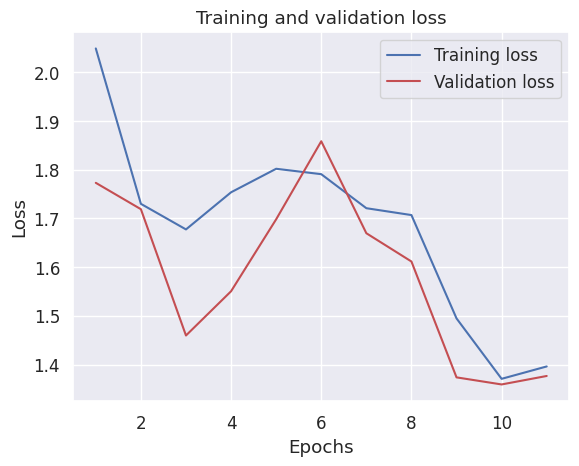

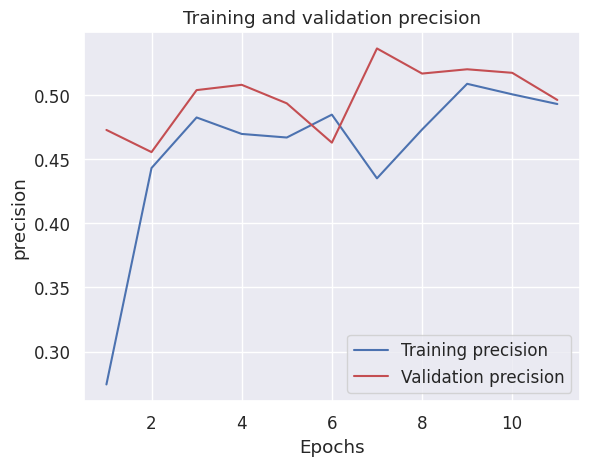

In [127]:
#繪製訓練與驗證的損失分數
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf() #清空之前的圖像
f1 = history_dict['precision']
val_f1 = history_dict['val_precision']

plt.plot(epochs, f1, 'b', label='Training precision')
plt.plot(epochs, val_f1, 'r', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()
plt.show()

In [128]:
model.evaluate(x_test,y_test)

82/82 [==============================] - 0s 3ms/step - loss: 1.3789 - f1_score: 0.1825 - precision: 0.5072 - recall: 0.1224


[1.3788763284683228,
 array([0.616 , 0.0054, 0.    , 0.    , 0.    , 0.    , 0.6563],
       dtype=float32),
 0.5071542263031006,
 0.12236286699771881]

In [129]:
model.predict(x_test)

82/82 [==============================] - 0s 3ms/step


array([[0.0007, 0.1816, 0.1946, ..., 0.2054, 0.1867, 0.0009],
       [0.0145, 0.2097, 0.1865, ..., 0.1973, 0.1739, 0.016 ],
       [0.0029, 0.1893, 0.1685, ..., 0.2327, 0.1782, 0.0037],
       ...,
       [0.3292, 0.1099, 0.0459, ..., 0.0481, 0.0798, 0.335 ],
       [0.0039, 0.2012, 0.1544, ..., 0.22  , 0.2347, 0.0037],
       [0.0041, 0.2198, 0.2181, ..., 0.1671, 0.1604, 0.0047]],
      dtype=float32)